<a href="https://colab.research.google.com/github/Jack5Winnie/Data-Analysis/blob/master/%5BHMM%5D%20Hidden-Markov-Model-with-Stock-zigzag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xlrd
import datetime
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from matplotlib.dates import (YearLocator, MonthLocator, DateFormatter)
import seaborn as sns
import matplotlib.style as style
#style.available
style.use('fivethirtyeight')
from hmmlearn.hmm import GaussianHMM

In [ ]:
data = pdr.DataReader('2330.tw','yahoo','2015-5-28', datetime.date.today()).reindex()
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-17,435.0,425.5,427.0,435.0,34137731.0,435.0
2020-08-18,440.5,432.0,440.0,433.0,41643160.0,433.0
2020-08-19,436.5,427.5,436.0,427.5,31486800.0,427.5
2020-08-20,427.5,401.0,427.0,415.0,75097235.0,415.0
2020-08-21,423.5,421.0,421.5,422.0,9454000.0,422.0


In [ ]:
from matplotlib.font_manager import FontProperties
params = { 'font.sans-serif':'Microsoft JhengHei', 'axes.unicode_minus':False, 'font.size':9, 'axes.unicode_minus':False,  #用来正常显示负号
           'grid.linewidth':0.5, "axes.grid": True, 'lines.linewidth':1.0,
           'figure.figsize':(20, 5), "date.autoformatter.month":"%Y-%m", "date.autoformatter.day":"%Y-%m-%d", 'figure.autolayout': True  } 
plt.rcParams.update(params)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


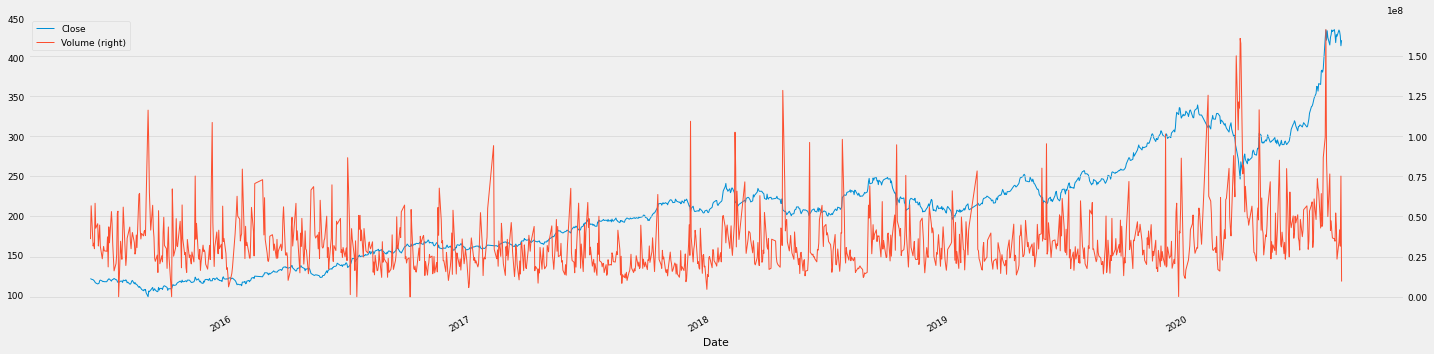

In [ ]:
df_TSMC = data[['Adj Close','Volume']].reindex()
df_TSMC.rename(columns={'Adj Close':'Close'},inplace=True)
df_TSMC.plot(figsize=(20,5), secondary_y='Volume')

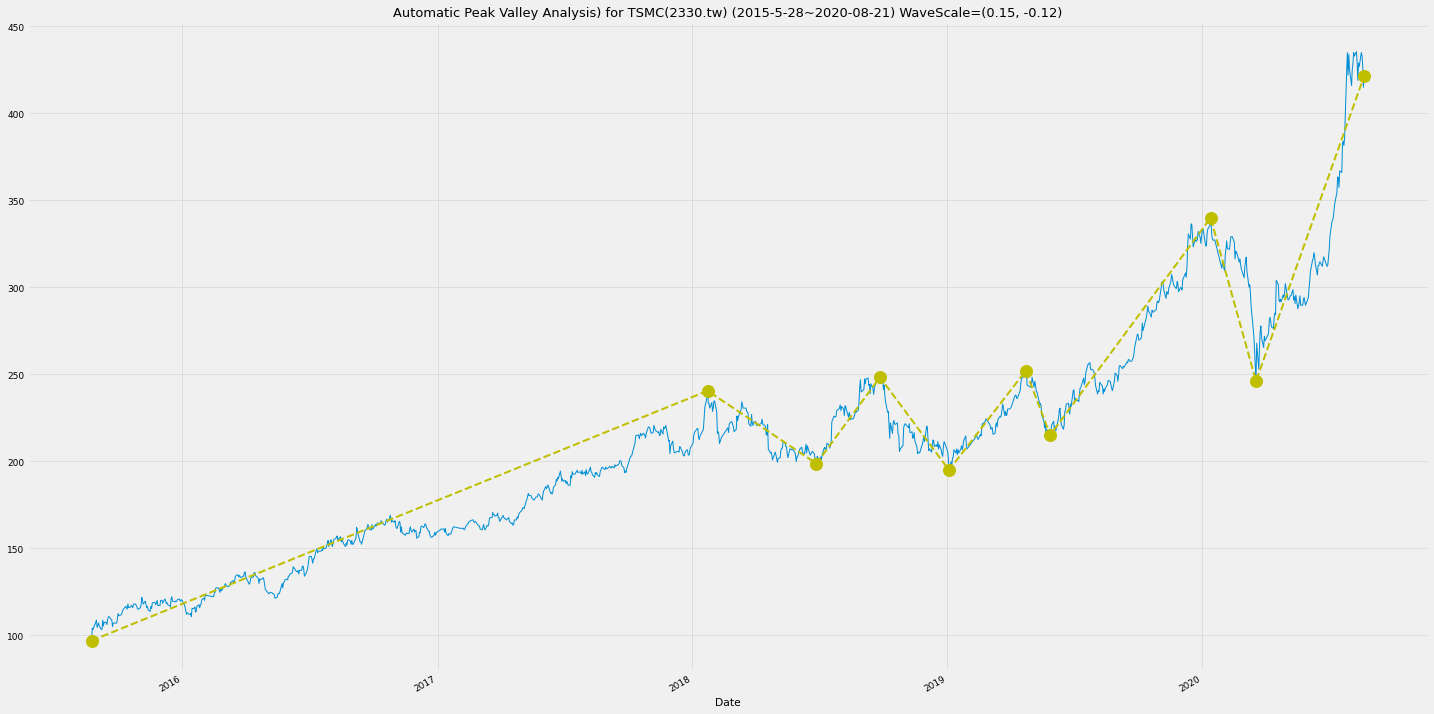

In [ ]:
import zigzag as zz
ticker ='2330.tw'
tiName ="TSMC"
start_date = '2015-5-28'
end_date = datetime.date.today()
data = pdr.DataReader(ticker, 'yahoo', end=end_date)['Adj Close'].reset_index()
data.rename(columns={'Adj Close': 'TSMC'}, inplace=True)
data.set_index(keys=['Date'], inplace=True)
X = data['TSMC']
WaveScale =(0.15, -0.12)     # 波段操作規模
pivots = zz.peak_valley_pivots(X.values, WaveScale[0], WaveScale[1])
zz.identify_initial_pivot
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
Title ='Automatic Peak Valley Analysis) for {0}({1}) ({2}~{3}) WaveScale={4}'.format(tiName, ticker, start_date, end_date, WaveScale)
X.plot(figsize=(20,10), title=Title)
ts_pivots.plot(style='yo--', linewidth=2, markersize=12)    # 自動化波峰波谷分析 (Automatic Peak-Valley Analysis)
plt.savefig('[PV] {0}.png'.format(Title))

In [ ]:
!pip install zigzag

     |████████████████████████████████| 133kB 2.8MB/s 
  Created wheel for zigzag: filename=ZigZag-0.2.2-cp36-cp36m-linux_x86_64.whl size=451457 sha256=55a5e102cfb1ac6dd09126a12d981756486563e3ee6f783f0f72a504dd2fec4b
  Stored in directory: /root/.cache/pip/wheels/e4/89/d3/e46d345744603d1508f478580b7a149e179f3a7cd7d7a27862
Successfully built zigzag


In [ ]:
ticker ='2330.tw'
tiName ="TSMC"
start_date = '2015-5-28'
end_date = datetime.date.today()
data_total = pdr.DataReader(ticker, 'yahoo', start_date, end=end_date).reset_index()
data_total.rename(columns={'Adj Close': 'TSMC'}, inplace=True)
data_total.set_index(keys=['Date'], inplace=True)
# unpack data（Divided the data in the package into three categories: Time, Closing 
# Price and stock number）
datas_raw=data_total.column_values(0)
close_v_raw=data_total.column_values(4)
volume_raw=data_total.column_values(5)
datas = np.array([datas_raw])
close_v = np.array([close_v_raw])
volume = np.array([close_v_raw])[1:]
# take diff of close value（Calculate return rate, previous price – next price）
# this makes len(diff) = len(close_t) - 1
# therefore, others quantity also need to be shifted
diff = close_v[1:] - close_v[:-1]
dates = dates[1:]
close_v = close_v[1:]
# pack diff and volume for training
X = np.column_stack([diff, volume])     

FileNotFoundError: ignored

In [ ]:
/content